# 1. 讀入封包

In [93]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from datetime import datetime
import os
import pylab as plt
import numpy as np

# 2. 資料前處理

In [94]:
# the dir of train & test datas
train_dir = "train_image"
test_dir = "test_image"

# return the paths & labels foreach picture in dir 
def make_paths_label(dir):
    img_paths = []
    img_label = []
    
    for root_dir in os.listdir(os.path.join('handwrite__detect', dir)):
        if root_dir[0] != '.':
            for num in os.listdir(os.path.join('handwrite__detect', dir, root_dir)):
                if num[0] != '.':
                    for item in os.listdir(os.path.join('handwrite__detect', dir, root_dir, num)):
                        if item[0] != '.':
                            img_paths.append(os.path.join('handwrite__detect', dir, root_dir, num, item))
                            img_label.append(num)
    
    img = []
    for i in img_paths:
        img.append(plt.imread(i))
    img = np.array(img)
    img = img[:, :, :, 0]
    img = np.expand_dims(img, axis=3)
    img = img.astype('float32')
    img /= 255
 
    img_label = np.array(img_label)
    img_label = tf.keras.utils.to_categorical(img_label)
 
    rnd = np.random.permutation(img_label.shape[0])
    img = img[rnd, :]
    img_label = img_label[rnd]
 
 
    return img, img_label

In [95]:
# 圖片Tensor 與 label Tensor Zip起來成一個pair
# shuffle打散
def make_dataset(dir):
  images, labels = make_paths_label(dir)
  train_image = tf.data.Dataset.from_tensor_slices(images)
  train_label = tf.data.Dataset.from_tensor_slices(labels)
  # 將路徑tensor映射成圖片tensor 
  # 合併圖片與label資料集
  full_ds = tf.data.Dataset.zip((train_image,train_label))
  # 打散
  full_ds = full_ds.shuffle(shuffle_buffer,reshuffle_each_iteration=False)
  return full_ds, len(images)

# get train_ds
full_ds, Sub_len = make_dataset(train_dir)
test_ds, test_len = make_dataset(test_dir)

In [159]:


# 添加batch
# todo
batch_size = 32

full_ds = full_ds.batch(batch_size)


In [160]:
input_shape = (28, 28, 1)

# 自訂你的model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(5, 5), activation="relu", name="Conv2D_32Filters"),
        layers.MaxPooling2D(pool_size=(2, 2), name="First_Pooling"),
        layers.Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation="relu", name="Conv2D_64Filters"),
        layers.MaxPooling2D(pool_size=(2, 2), name="Second_Pooling"),
        layers.Flatten(name="Flatten_Layer"),
        layers.Dense(512, activation="relu",  name="FullyConnected"),
        layers.Dropout(0.5,  name="Drop"),
        layers.Dense(10, activation="softmax", name="Number"),
    ]
)
model._name = "numberRecognition"
model.summary()

Model: "numberRecognition"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_32Filters (Conv2D)   (None, 24, 24, 32)        832       
                                                                 
 First_Pooling (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 Conv2D_64Filters (Conv2D)   (None, 10, 10, 64)        18496     
                                                                 
 Second_Pooling (MaxPooling2  (None, 5, 5, 64)         0         
 D)                                                              
                                                                 
 Flatten_Layer (Flatten)     (None, 1600)              0         
                                                                 
 FullyConnected (Dense)      (None, 512)         

In [ ]:
epochs = 90


# model.compile 決定learning strategy、Loss caculator
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

train_history = model.fit(full_ds,epochs=epochs)

Epoch 1/90
77/77 [==============================] - 1s 12ms/step - loss: 0.8363 - accuracy: 0.7294
Epoch 2/90
77/77 [==============================] - 1s 12ms/step - loss: 0.1572 - accuracy: 0.9539
Epoch 3/90
77/77 [==============================] - 1s 12ms/step - loss: 0.0928 - accuracy: 0.9702
Epoch 4/90
77/77 [==============================] - 1s 11ms/step - loss: 0.0530 - accuracy: 0.9865
Epoch 5/90
75/77 [============================>.] - ETA: 0s - loss: 0.0495 - accuracy: 0.9850

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


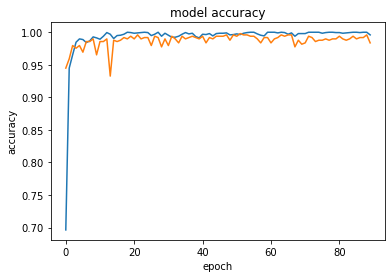

In [154]:
print(train_history.history.keys())

plt.plot(train_history.history['accuracy'])
plt.plot(train_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

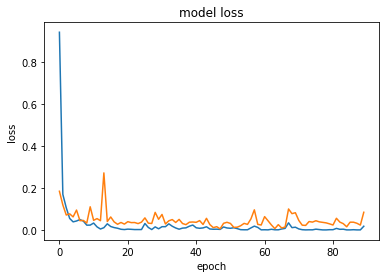

In [155]:
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [156]:
# 讀入測試資料並評估模型
test_ds, test_len = make_dataset(test_dir)
test_ds = test_ds.batch(batch_size)
score = model.evaluate(test_ds)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

54/54 [==============================] - 0s 5ms/step - loss: 0.2066 - accuracy: 0.9559
Test loss: 0.20659230649471283
Test accuracy: 0.9558823704719543
